In [1]:
from mlzero.supervised_learning.decision_tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as DecisionTreeClassifierSklearn
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

In [3]:
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

In [4]:
# calculate mesh from the points in the dataset
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

Text(0, 0.5, 'sepal width (cm)')

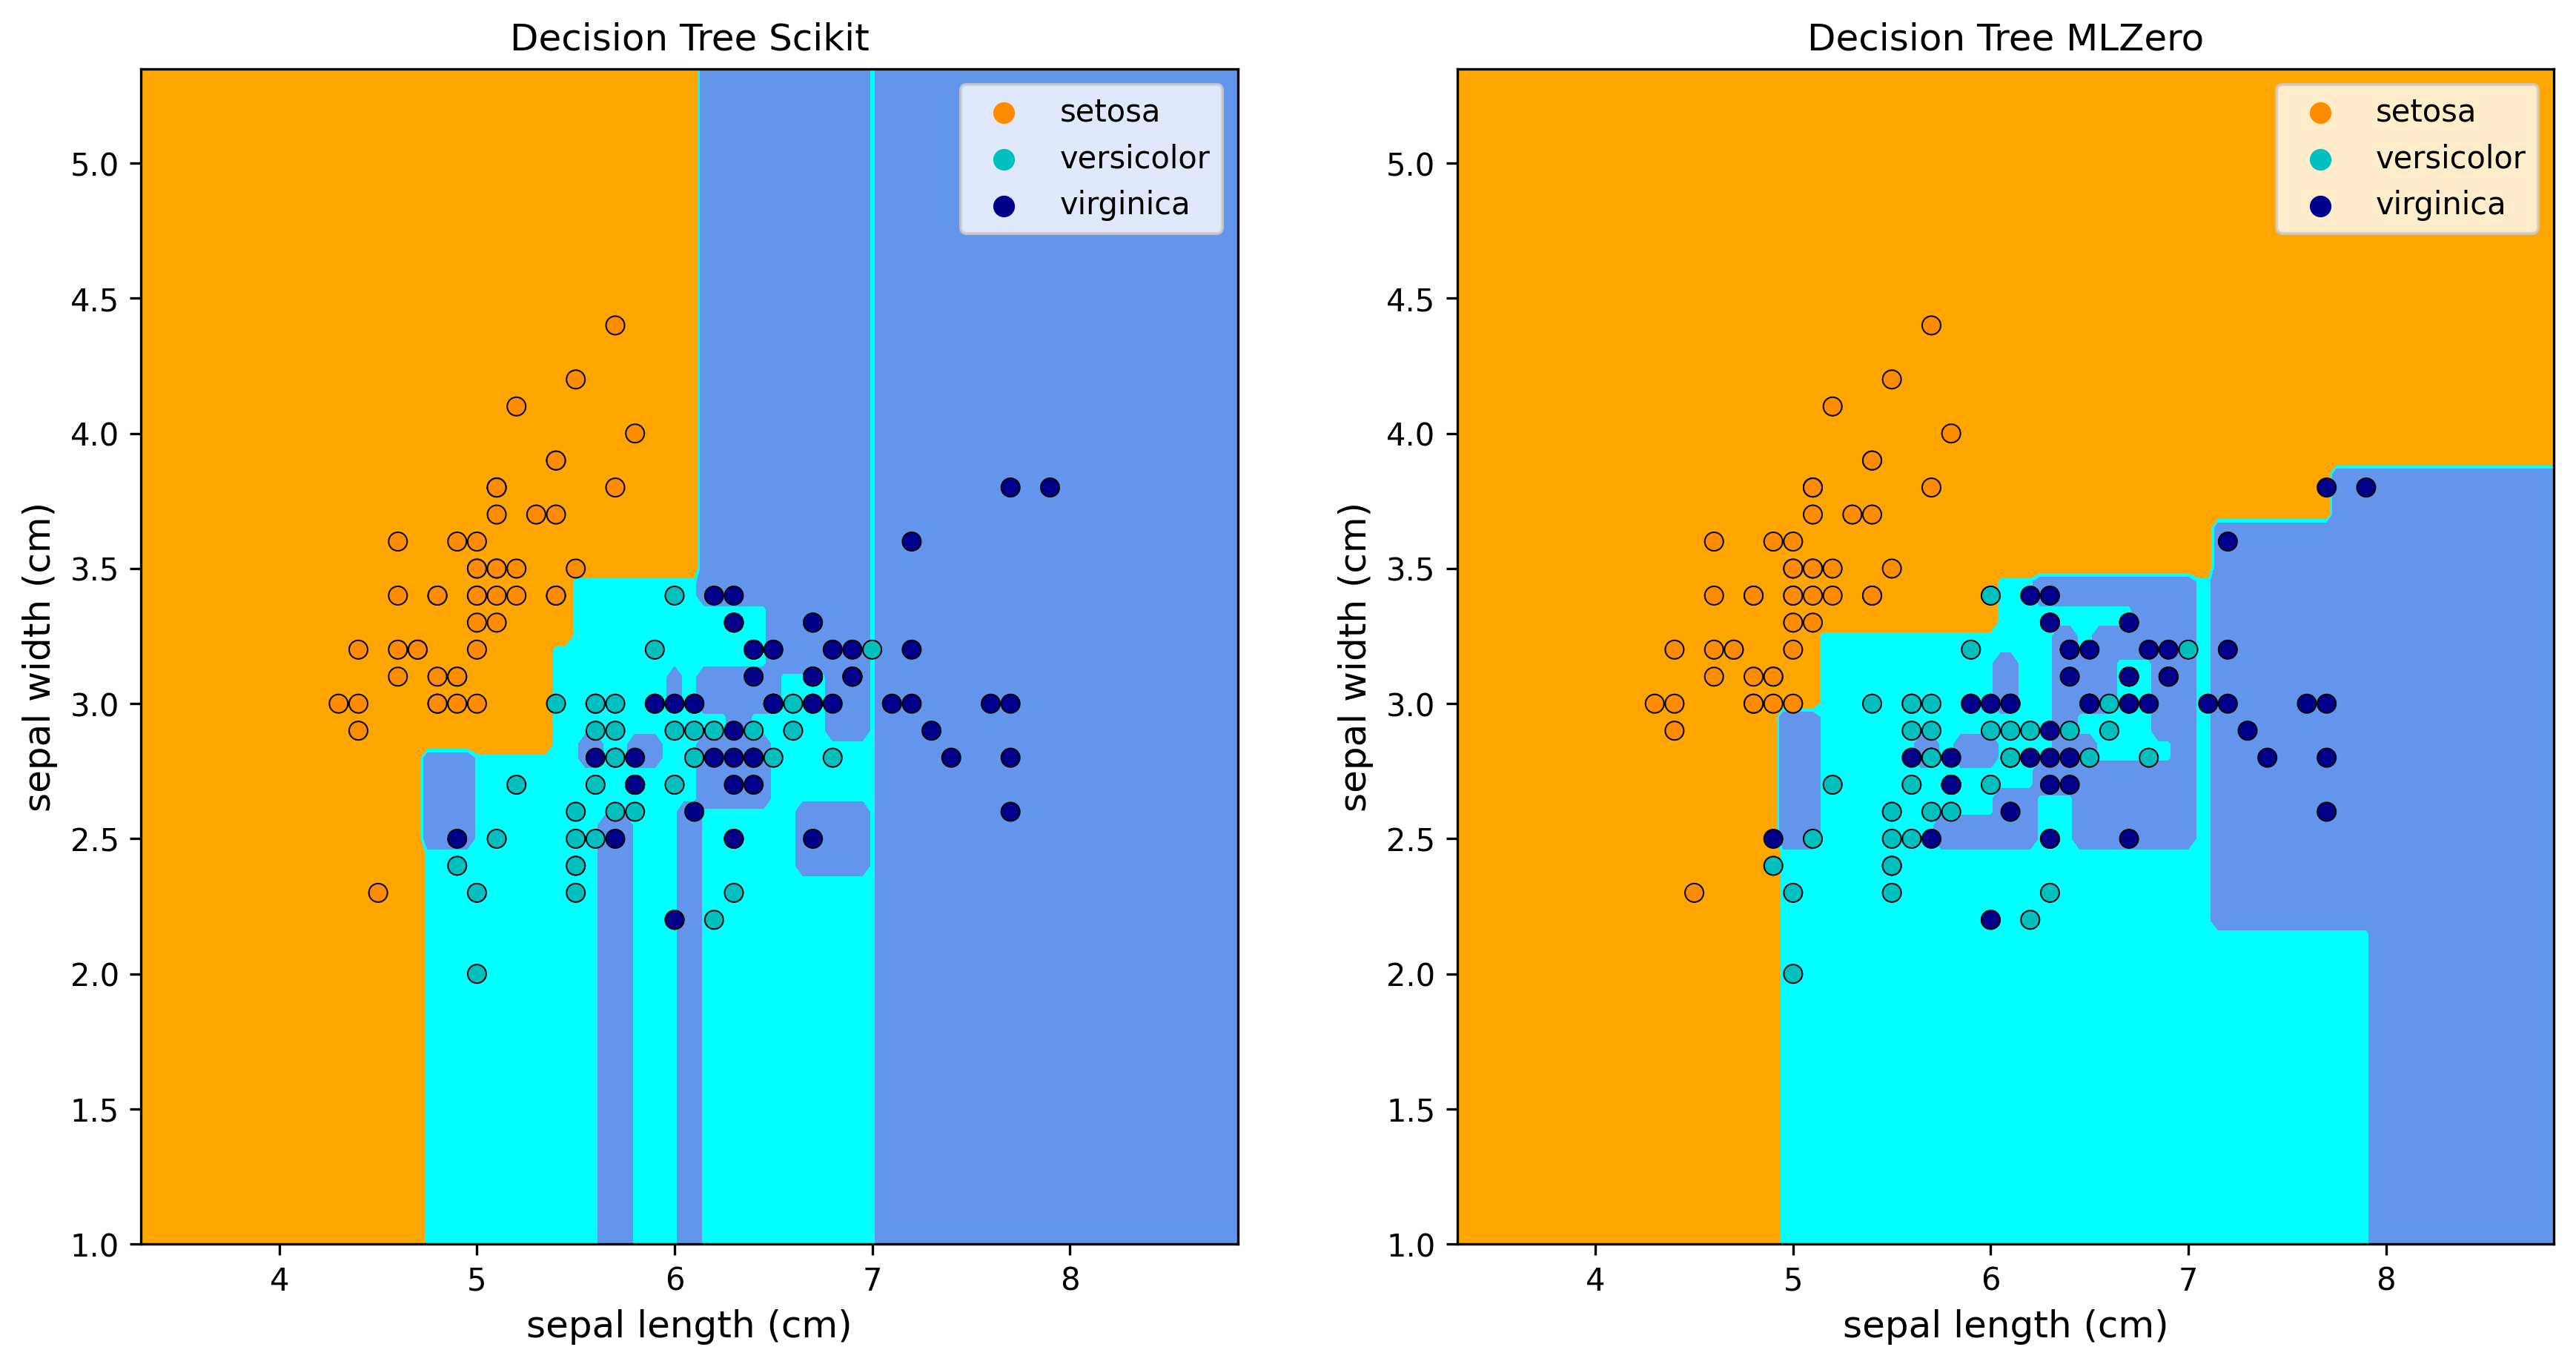

In [5]:
model_sklearn = DecisionTreeClassifierSklearn().fit(X, y)
model_mlzero = DecisionTreeClassifier().fit(X, y)

plt.figure(figsize = (14, 7), dpi = 300)

plt.subplot(1, 2, 1)

Z = model_sklearn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Tree Scikit", fontsize = 12)
plt.xlabel(iris.feature_names[0], fontsize = 12)
plt.ylabel(iris.feature_names[1], fontsize = 12)


plt.subplot(1, 2, 2)

Z = model_mlzero.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Tree MLZero", fontsize = 12)
plt.xlabel(iris.feature_names[0], fontsize = 12)
plt.ylabel(iris.feature_names[1], fontsize = 12)